In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json 

In [2]:
df = pd.read_csv("crypto-markets.csv")

In [3]:
print('\nHead')
print(df.head())


Head
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  28-04-2013        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  29-04-2013        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  30-04-2013        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  01-05-2013        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  02-05-2013        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.488567e+09       0.5438    3.88  
1  144.54     0.0  1.603769e+09       0.7813   13.49  
2  139.00     0.0  1.542813e+09       0.3843   12.88  
3  116.99     0.0  1.298955e+09       0.2882   32.17  
4  105.21     0.0  1.168517e+09       0.3881   33.32  


In [4]:
df.corr()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
ranknow,1.000000,-0.209653,-0.208570,-0.211508,-0.209920,-0.227230,-0.277860,-0.002764,-0.134488
open,-0.209653,1.000000,0.999039,0.998415,0.998076,0.821439,0.928090,0.029238,0.784603
high,-0.208570,0.999039,1.000000,0.998012,0.999068,0.825111,0.928643,0.032445,0.798389
low,-0.211508,0.998415,0.998012,1.000000,0.998979,0.813680,0.929265,0.032841,0.758857
close,-0.209920,0.998076,0.999068,0.998979,1.000000,0.820921,0.929970,0.037589,0.779522
volume,-0.227230,0.821439,0.825111,0.813680,0.820921,1.000000,0.873808,0.038451,0.752313
market,-0.277860,0.928090,0.928643,0.929265,0.929970,0.873808,1.000000,0.043937,0.717836
close_ratio,-0.002764,0.029238,0.032445,0.032841,0.037589,0.038451,0.043937,1.000000,0.021510
spread,-0.134488,0.784603,0.798389,0.758857,0.779522,0.752313,0.717836,0.021510,1.000000


In [5]:
grp = df.groupby('slug')

In [6]:
slugs = df['slug'].unique()
slugs

array(['bitcoin', 'ripple', 'ethereum', 'stellar', 'bitcoin-cash', 'eos',
       'litecoin', 'tether', 'bitcoin-sv', 'cardano', 'monero', 'tron',
       'iota', 'dash', 'nem', 'binance-coin', 'neo', 'ethereum-classic',
       'zcash', 'bitcoin-gold', 'tezos', 'maker', 'vechain', 'dogecoin',
       'ontology', '0x', 'omisego', 'basic-attention-token', 'trueusd',
       'qtum', 'usd-coin', 'decred'], dtype=object)

In [7]:
groupedDataDF = {}
for index, col in enumerate(slugs):
    groupedDataDF[col] = grp.get_group(col)

In [8]:
#Returns dataframe with two columns : 1. slug 2.(passed in function)
def getColumnDFWithSlug(column):
    allData = []
    for index, col in enumerate(slugs):
        allData.append(groupedDataDF[col][column])
    list_of_tuples = list(zip(*allData))
    df_volume = pd.DataFrame(list_of_tuples, columns = slugs)
    return df_volume

In [9]:
def showHeatmap(corr_df, title):
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.heatmap(corr_df, annot=True, cmap=plt.cm.Reds, linewidths=.5, ax=ax)
    ax.set_title(title.capitalize())
    plt.show()

In [10]:
df_volume = getColumnDFWithSlug('volume')

In [11]:
volume_corr = df_volume.corr()
volume_corr

,bitcoin,ripple,ethereum,stellar,bitcoin-cash,eos,litecoin,tether,bitcoin-sv,cardano,...,vechain,dogecoin,ontology,0x,omisego,basic-attention-token,trueusd,qtum,usd-coin,decred
bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ripple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethereum,NaN,NaN,1.000000,0.743150,-0.161114,-0.161792,NaN,0.177004,-0.053677,-0.319490,...,-0.083635,-0.197226,0.325286,-0.212265,0.109425,0.018508,-0.446961,0.194658,0.491826,-0.181847
stellar,NaN,NaN,0.743150,1.000000,-0.420415,0.166541,NaN,0.193521,-0.253423,-0.294250,...,-0.330399,-0.539329,0.501198,0.069041,-0.063992,0.308792,-0.336845,-0.121340,0.390912,-0.256654
bitcoin-cash,NaN,NaN,-0.161114,-0.420415,1.000000,-0.445171,NaN,0.244668,0.420786,-0.307351,...,0.223580,0.501799,-0.490716,-0.215505,0.205094,-0.223371,-0.370743,0.345506,-0.231196,0.147766
eos,NaN,NaN,-0.161792,0.166541,-0.445171,1.000000,NaN,-0.076494,-0.388346,0.280406,...,-0.437865,-0.541289,0.156679,0.327540,-0.204172,0.181338,0.111547,-0.240334,0.117302,-0.382520
litecoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tether,NaN,NaN,0.177004,0.193521,0.244668,-0.076494,NaN,1.000000,-0.130109,-0.198451,...,-0.014593,-0.073328,-0.246783,-0.040787,0.166625,-0.046233,-0.230565,0.272929,-0.088133,0.026990
bitcoin-sv,NaN,NaN,-0.053677,-0.253423,0.420786,-0.388346,NaN,-0.130109,1.000000,-0.429475,...,0.270484,0.451540,-0.256696,-0.235622,-0.166103,-0.331095,-0.346019,0.097957,0.076918,-0.114403
cardano,NaN,NaN,-0.319490,-0.294250,-0.307351,0.280406,NaN,-0.198451,-0.429475,1.000000,...,0.061110,-0.163189,0.329667,-0.161480,-0.368625,-0.266030,0.791945,-0.251411,-0.214610,0.315775


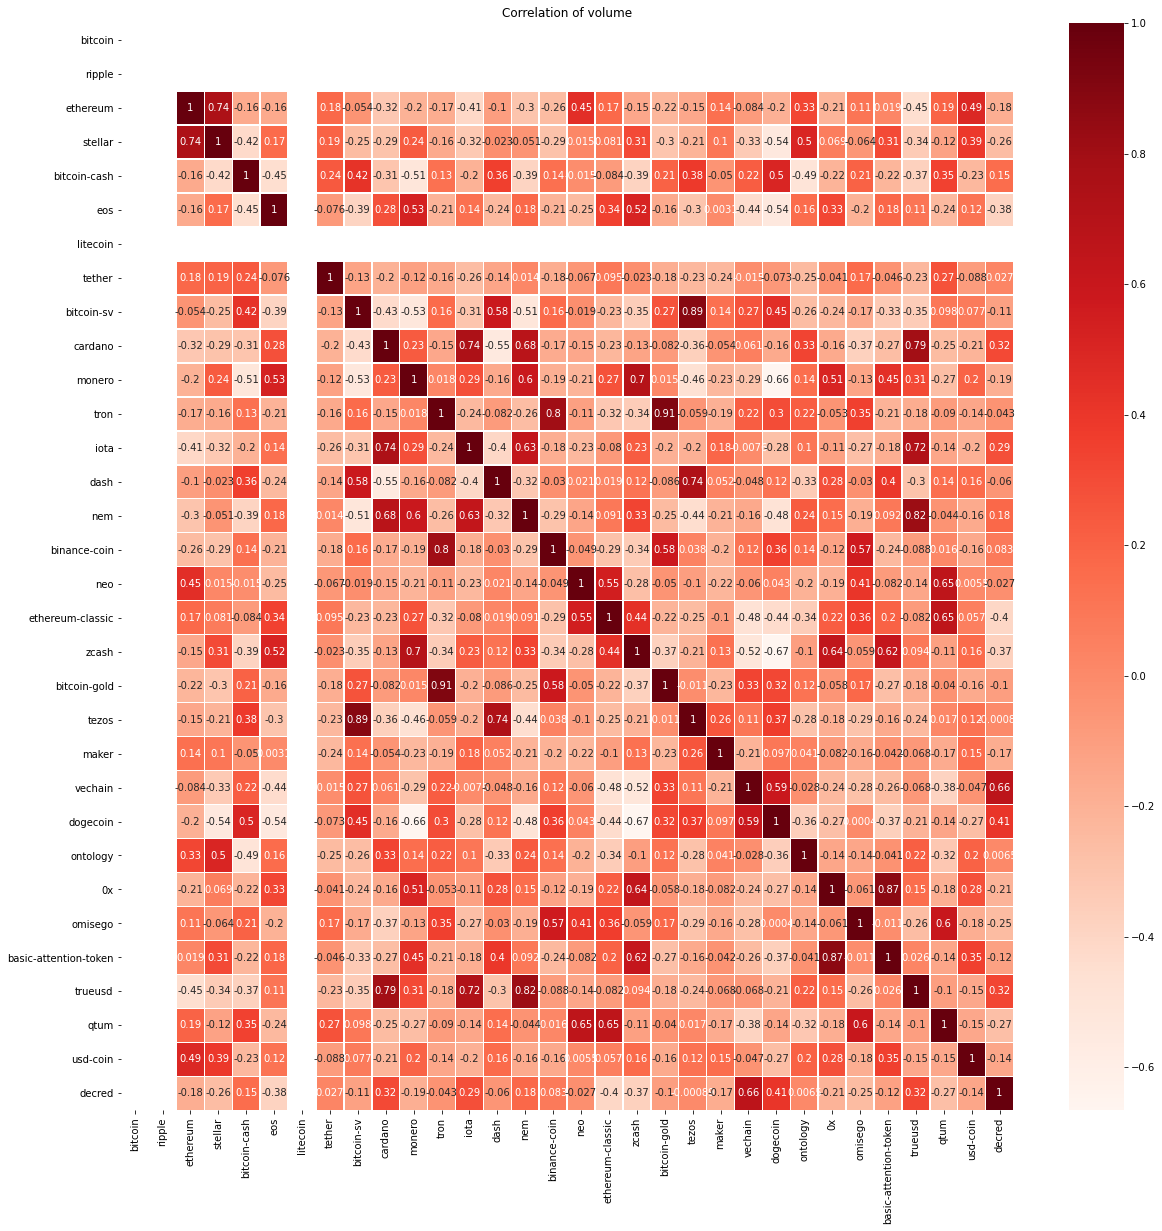

In [12]:
showHeatmap(volume_corr, "Correlation of Volume")

In [13]:
df_open = getColumnDFWithSlug('open')

In [14]:
open_corr = df_open.corr()
open_corr

,bitcoin,ripple,ethereum,stellar,bitcoin-cash,eos,litecoin,tether,bitcoin-sv,cardano,...,vechain,dogecoin,ontology,0x,omisego,basic-attention-token,trueusd,qtum,usd-coin,decred
bitcoin,1.000000,0.390496,0.154057,-0.376754,0.349764,-0.050048,0.816110,-0.377105,-0.325838,0.105939,...,0.461423,-0.606656,0.612536,-0.729842,-0.439890,-0.649981,0.004743,-0.284033,-0.499717,-0.296953
ripple,0.390496,1.000000,0.288953,-0.269266,-0.001954,-0.399890,0.077338,0.060714,-0.123207,0.215037,...,0.785483,-0.386926,0.456871,-0.456841,-0.088140,-0.274053,0.313688,0.021841,-0.378229,0.283740
ethereum,0.154057,0.288953,1.000000,0.015221,0.246294,-0.562045,0.274769,0.718725,-0.172995,-0.127601,...,0.132021,-0.024187,0.675274,-0.442521,-0.123746,-0.213832,0.001253,-0.059313,-0.086726,-0.245905
stellar,-0.376754,-0.269266,0.015221,1.000000,0.447754,0.554120,-0.001683,0.040080,0.704727,-0.675712,...,-0.084899,0.462357,-0.108558,0.165842,-0.536456,0.617018,0.163960,-0.621442,0.112766,-0.469208
bitcoin-cash,0.349764,-0.001954,0.246294,0.447754,1.000000,0.244641,0.578332,-0.010651,0.311263,-0.702559,...,0.113280,0.107433,0.417001,-0.369249,-0.554797,-0.010505,0.079539,-0.496758,-0.352632,-0.717802
eos,-0.050048,-0.399890,-0.562045,0.554120,0.244641,1.000000,0.199204,-0.612010,0.618393,-0.568501,...,-0.107604,0.076945,-0.350622,0.366332,-0.593977,0.427816,0.211429,-0.694810,0.300200,-0.440025
litecoin,0.816110,0.077338,0.274769,-0.001683,0.578332,0.199204,1.000000,-0.252205,-0.097761,-0.259451,...,0.208435,-0.298167,0.548236,-0.497690,-0.703053,-0.337674,0.042289,-0.598275,-0.392396,-0.711502
tether,-0.377105,0.060714,0.718725,0.040080,-0.010651,-0.612010,-0.252205,1.000000,-0.096022,0.042104,...,-0.008651,0.303508,0.398776,-0.006235,0.267382,0.198099,-0.240666,0.254608,0.014422,0.027146
bitcoin-sv,-0.325838,-0.123207,-0.172995,0.704727,0.311263,0.618393,-0.097761,-0.096022,1.000000,-0.680760,...,0.052637,0.502413,-0.118742,0.245905,-0.430546,0.623157,0.328009,-0.572577,0.236544,-0.395832
cardano,0.105939,0.215037,-0.127601,-0.675712,-0.702559,-0.568501,-0.259451,0.042104,-0.680760,1.000000,...,0.080126,-0.244928,-0.032186,-0.114845,0.573403,-0.366178,-0.308043,0.630264,-0.226474,0.647218


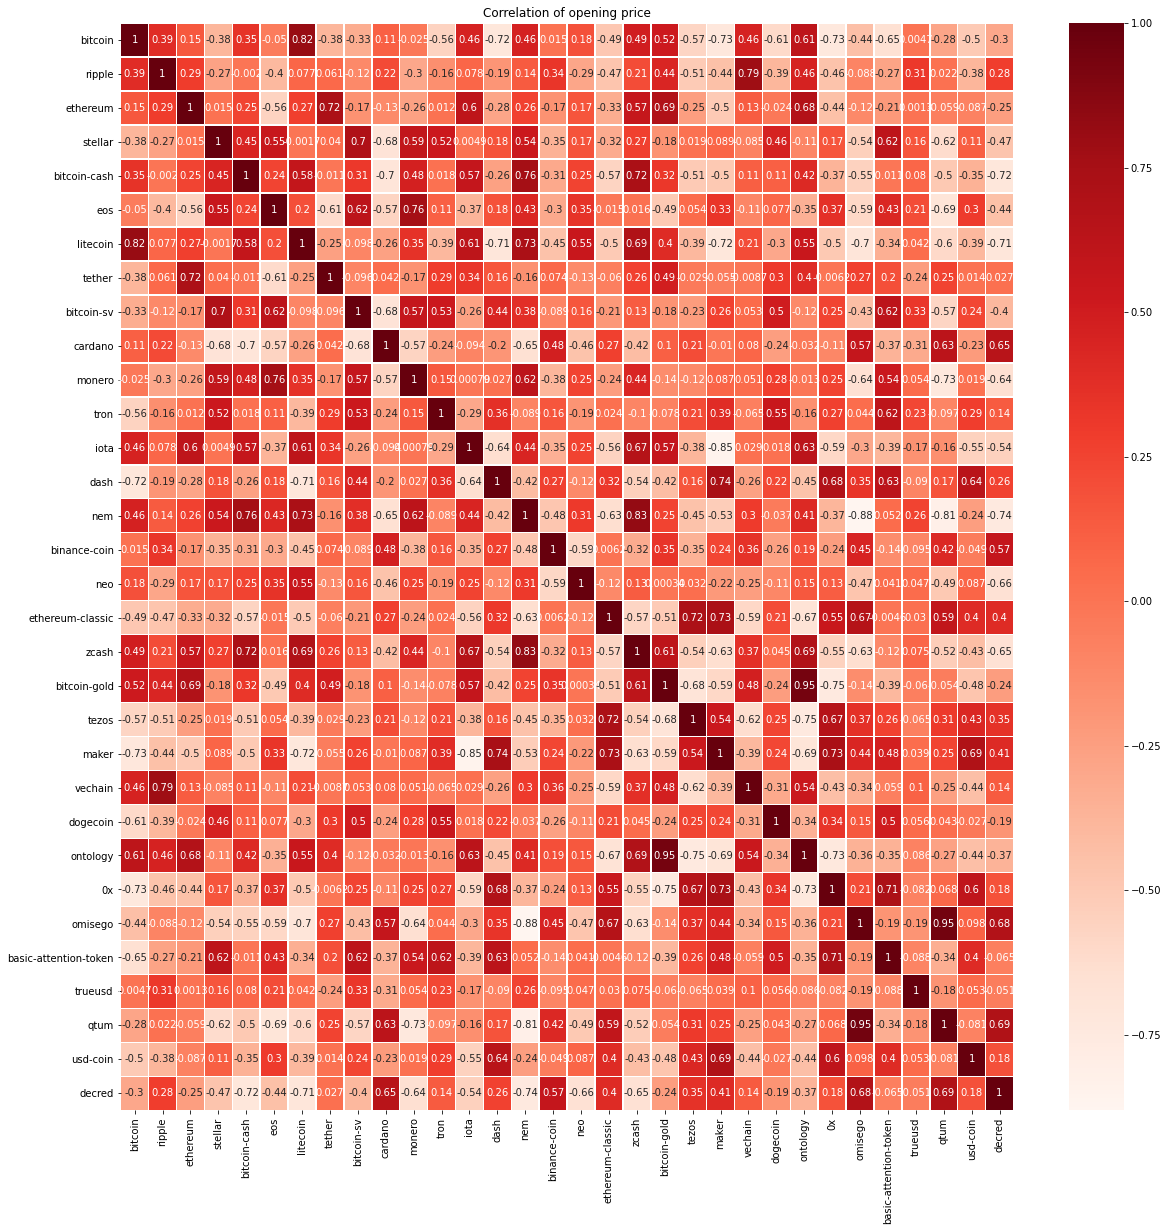

In [15]:
showHeatmap(open_corr, "Correlation of Opening Price")

In [16]:
#Returns dataframe with two columns : 1. slug 2.(passed in function)
def getColumnDFDateNvolume():
    allData = []
    for index, col in enumerate(slugs):
        allData.append(groupedDataDF[col][column])
    list_of_tuples = list(zip(*allData))
    df_volume = pd.DataFrame(list_of_tuples, columns = slugs)
    return df_volume

In [17]:
af = df
af

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,28-04-2013,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,29-04-2013,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,30-04-2013,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,01-05-2013,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,02-05-2013,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26904,decred,DCR,Decred,19-04-2018,32,61.75,62.97,60.70,62.24,13014000.0,4.447303e+08,0.6784,2.27
26905,decred,DCR,Decred,20-04-2018,32,62.24,66.91,61.95,66.39,14092000.0,4.744330e+08,0.8952,4.96
26906,decred,DCR,Decred,21-04-2018,32,66.43,67.98,65.04,67.35,14653500.0,4.812815e+08,0.7857,2.94
26907,decred,DCR,Decred,22-04-2018,32,67.35,67.35,64.08,64.47,13385700.0,4.607189e+08,0.1193,3.27


In [18]:
af['date'] = pd.to_datetime(af['date']).dt.strftime('%m-%d-%Y')
af['date']

0        04-28-2013
1        04-29-2013
2        04-30-2013
3        01-05-2013
4        02-05-2013
            ...    
26904    04-19-2018
26905    04-20-2018
26906    04-21-2018
26907    04-22-2018
26908    04-23-2018
Name: date, Length: 26909, dtype: object

In [19]:
import datetime as dt
af['date'] = pd.to_datetime(af['date'])
af = af[af['date'].dt.year >= 2016]
af

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
978,bitcoin,BTC,Bitcoin,2016-01-01,1,430.72,436.25,427.52,434.33,36278900.0,6.529300e+09,0.7801,8.73
979,bitcoin,BTC,Bitcoin,2016-02-01,1,434.62,436.06,431.87,433.44,30096600.0,6.517390e+09,0.3747,4.19
980,bitcoin,BTC,Bitcoin,2016-03-01,1,433.58,433.74,424.71,430.01,39633800.0,6.467430e+09,0.5869,9.03
981,bitcoin,BTC,Bitcoin,2016-04-01,1,430.06,434.52,429.08,433.09,38477500.0,6.515713e+09,0.7371,5.44
982,bitcoin,BTC,Bitcoin,2016-05-01,1,433.07,434.18,429.68,431.96,34522600.0,6.500393e+09,0.5067,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26904,decred,DCR,Decred,2018-04-19,32,61.75,62.97,60.70,62.24,13014000.0,4.447303e+08,0.6784,2.27
26905,decred,DCR,Decred,2018-04-20,32,62.24,66.91,61.95,66.39,14092000.0,4.744330e+08,0.8952,4.96
26906,decred,DCR,Decred,2018-04-21,32,66.43,67.98,65.04,67.35,14653500.0,4.812815e+08,0.7857,2.94
26907,decred,DCR,Decred,2018-04-22,32,67.35,67.35,64.08,64.47,13385700.0,4.607189e+08,0.1193,3.27


In [20]:
grp = af.groupby('slug')

In [21]:
latestGroupedDataDF = {}
for index, col in enumerate(slugs):
    latestGroupedDataDF[col] = grp.get_group(col)
latestGroupedDataDF['bitcoin']['volume'].to_list()

[36278900.0,
 30096600.0,
 39633800.0,
 38477500.0,
 34522600.0,
 34042500.0,
 87562200.0,
 56993000.0,
 32278000.0,
 35995900.0,
 40450000.0,
 115607000.0,
 173888000.0,
 43945500.0,
 153351008.0,
 120352000.0,
 45319600.0,
 54403900.0,
 46819800.0,
 121720000.0,
 68338000.0,
 91546600.0,
 56247400.0,
 54824800.0,
 59062400.0,
 58147000.0,
 47424400.0,
 59247900.0,
 86125296.0,
 30284400.0,
 37894300.0,
 51656700.0,
 40378700.0,
 45933400.0,
 69285504.0,
 43825000.0,
 49249300.0,
 37076300.0,
 47671100.0,
 55318500.0,
 85130896.0,
 74375600.0,
 67042800.0,
 61911700.0,
 74469800.0,
 74070496.0,
 73093104.0,
 83193600.0,
 76752600.0,
 55711300.0,
 93992096.0,
 89820704.0,
 85385200.0,
 85244896.0,
 67743696.0,
 70798000.0,
 61486000.0,
 41893600.0,
 53033400.0,
 60694700.0,
 74895800.0,
 74955296.0,
 100484000.0,
 90856096.0,
 135384992.0,
 91212496.0,
 85762400.0,
 70311696.0,
 70012304.0,
 81022896.0,
 73969696.0,
 92712896.0,
 74322800.0,
 95259400.0,
 66781700.0,
 65185800.0,
 8352

In [22]:
af['date'] = pd.to_datetime(af['date']).dt.strftime('%m-%d-%Y')

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
def showPlot(x,y, title):
    print()
    tick_spacing = 40
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    ax.plot(x,y)
    plt.xticks(rotation=60)
    ax.set_yticklabels(y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.title(label=title.capitalize(),fontsize=25,color="green")
    plt.xlabel(title + ' dates')
    plt.ylabel(title + ' volumes')
    plt.show()


Showing Plot of bitcoin



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


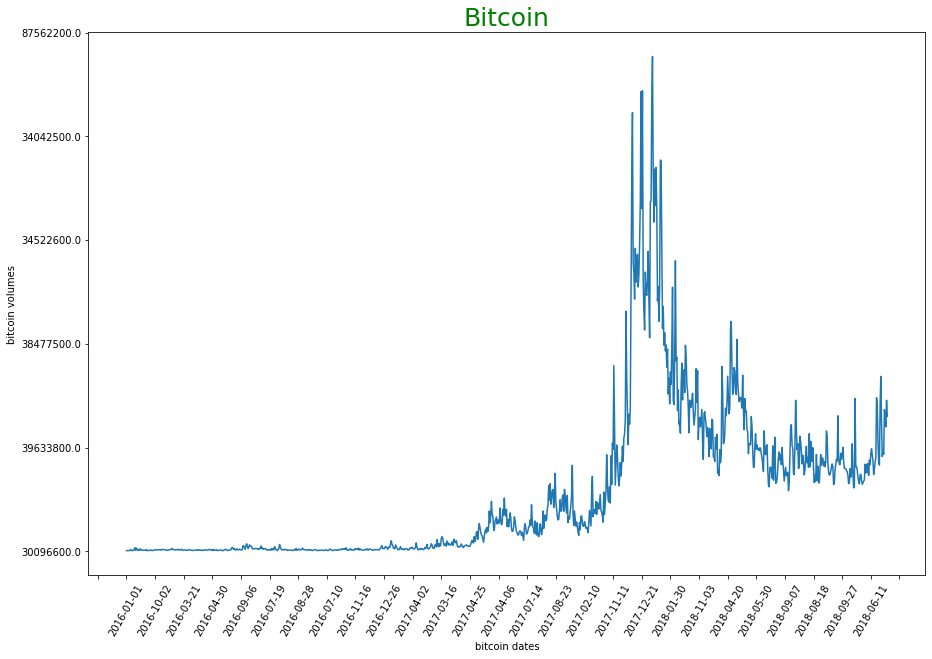


Showing Plot of ripple



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


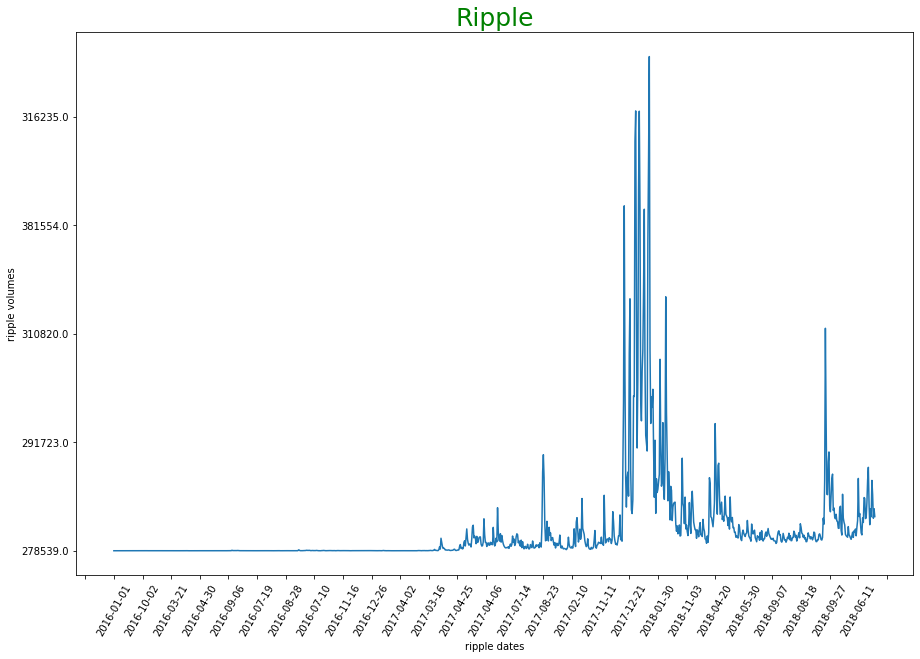


Showing Plot of ethereum



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


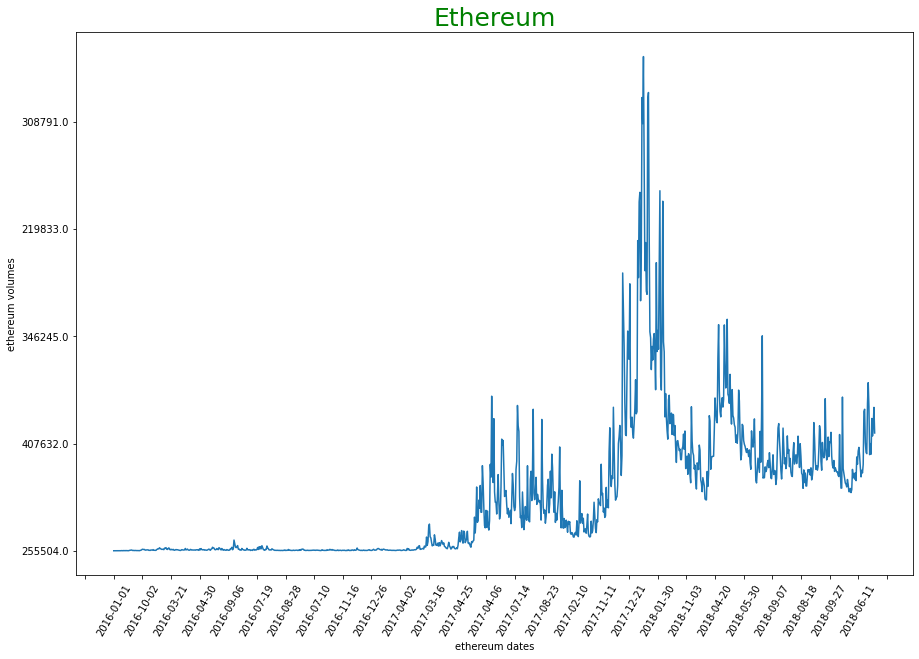


Showing Plot of stellar



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


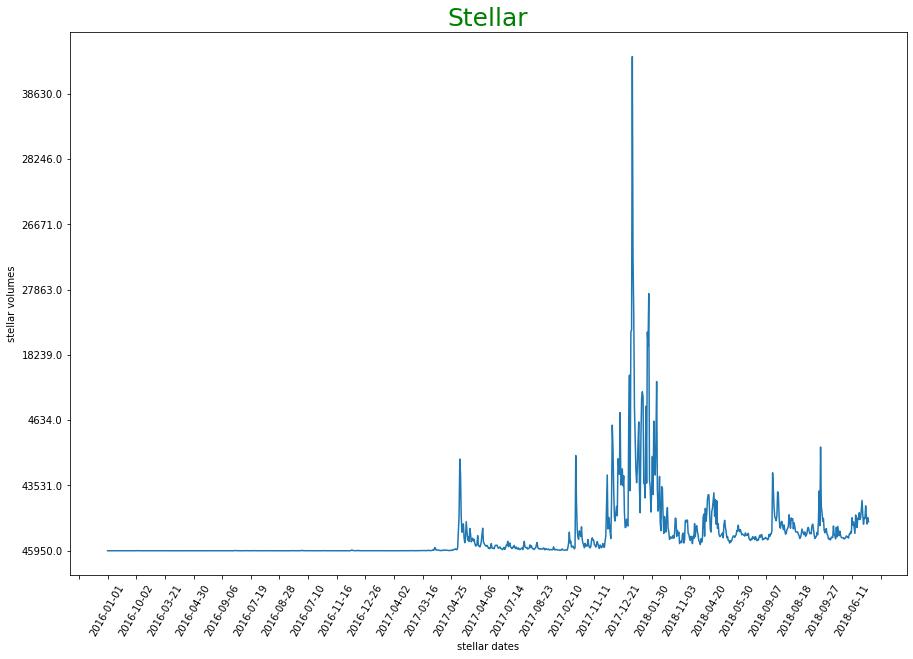


Showing Plot of bitcoin-cash



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


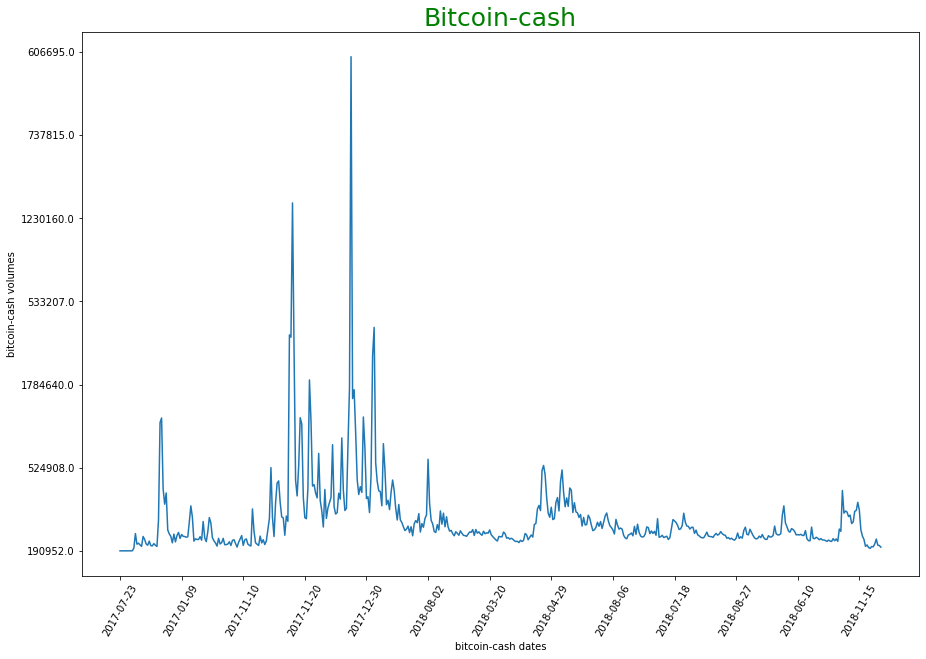


Showing Plot of eos



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


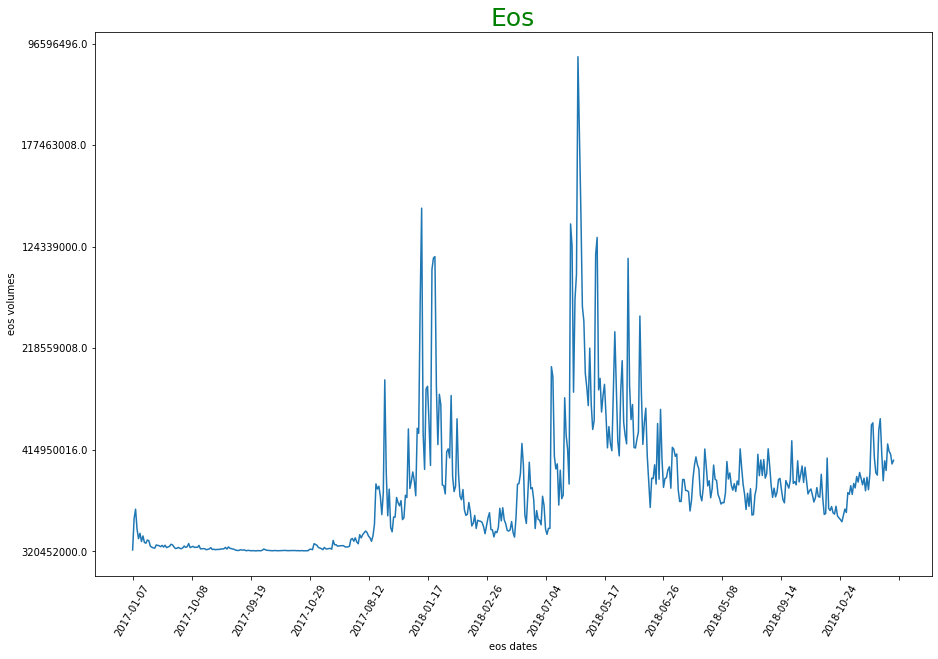


Showing Plot of litecoin



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


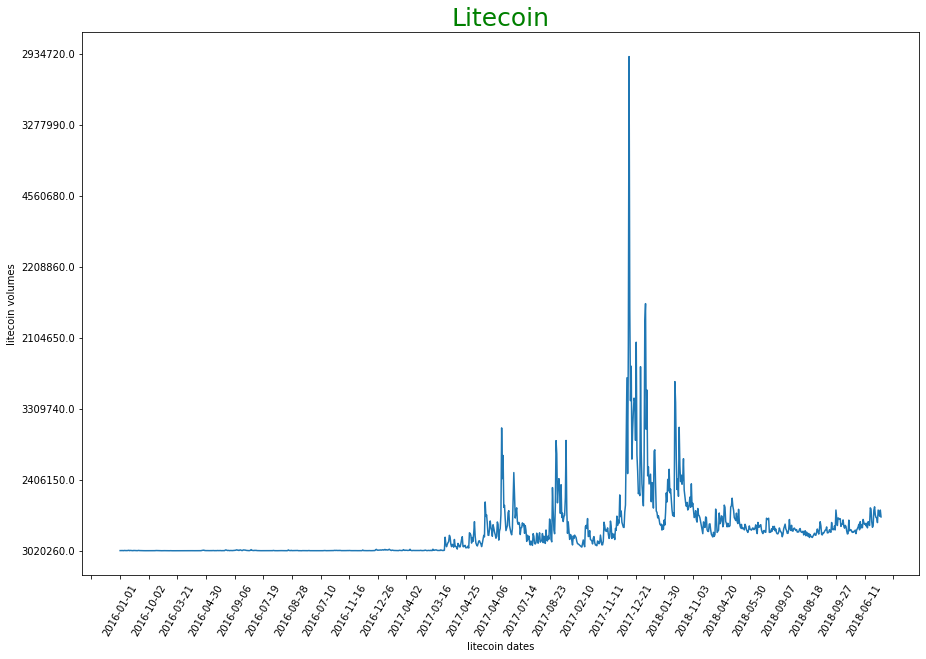


Showing Plot of tether



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


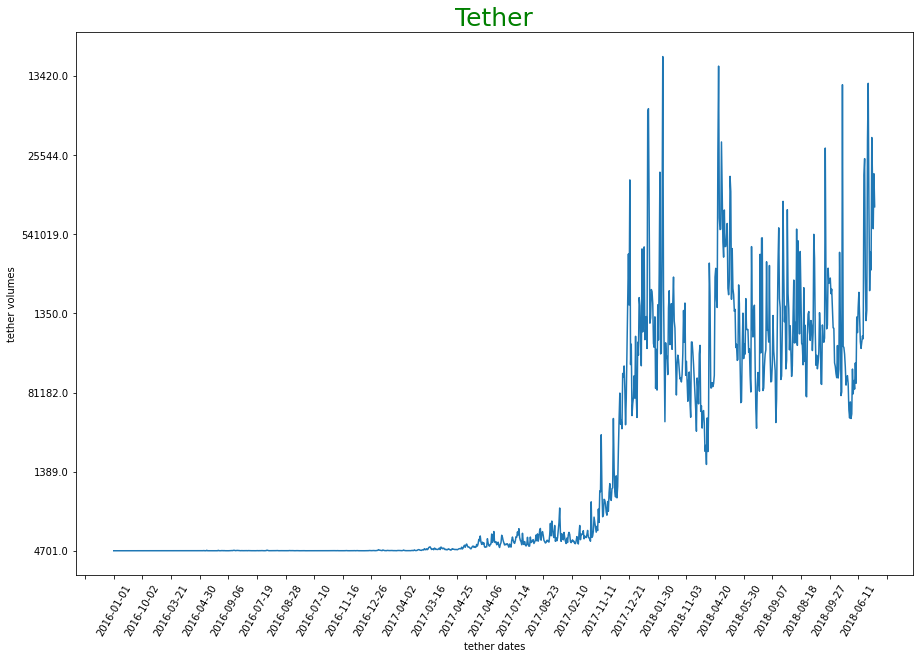


Showing Plot of bitcoin-sv



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


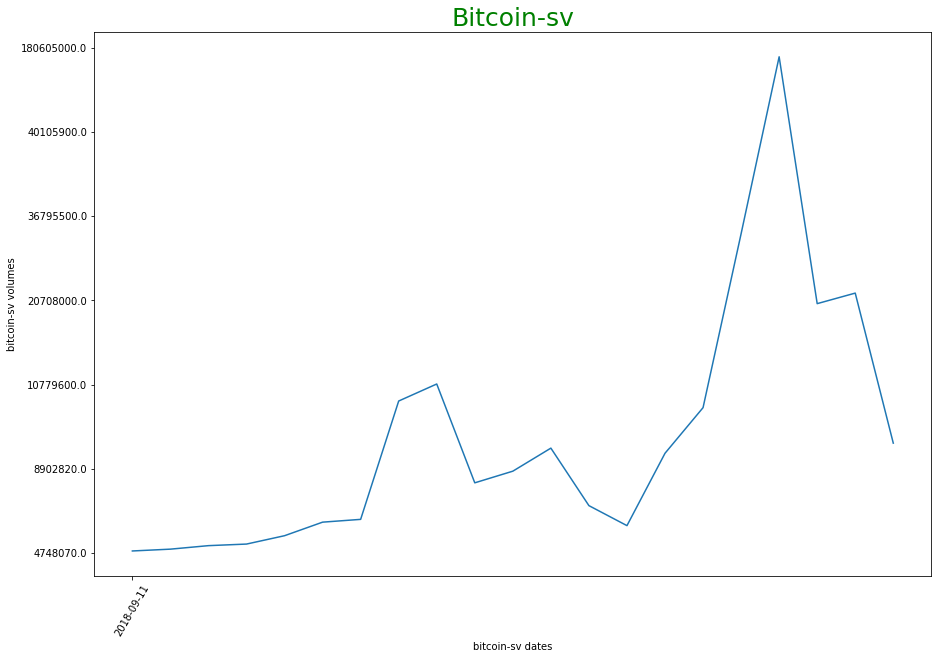


Showing Plot of cardano



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


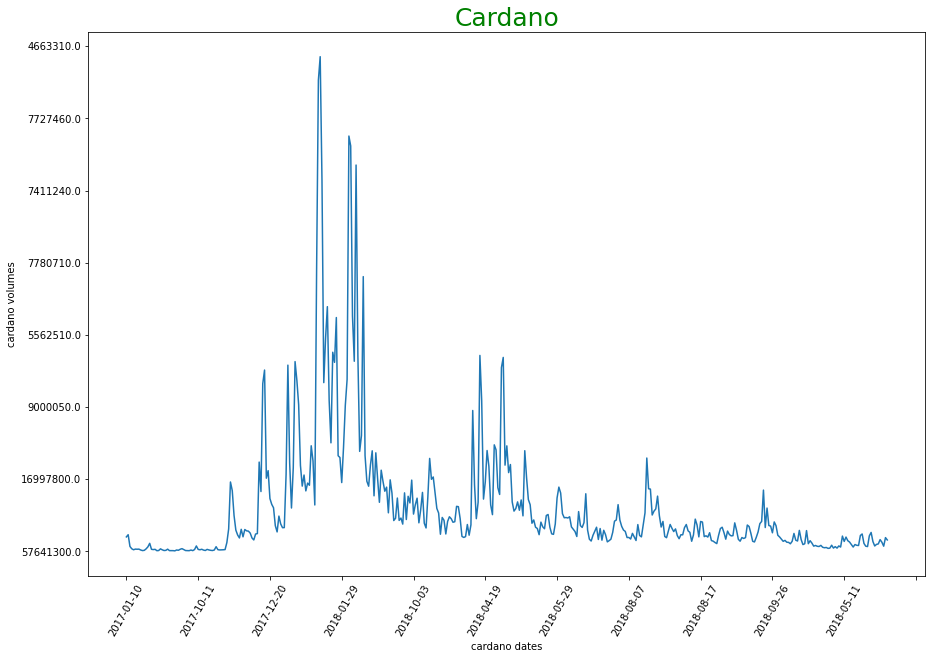


Showing Plot of monero



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


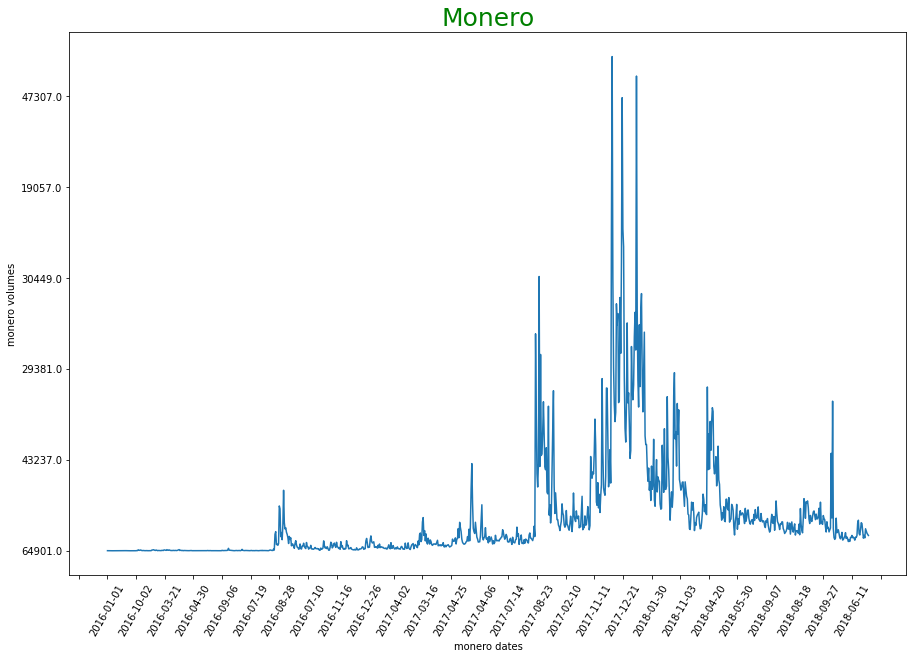


Showing Plot of tron



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


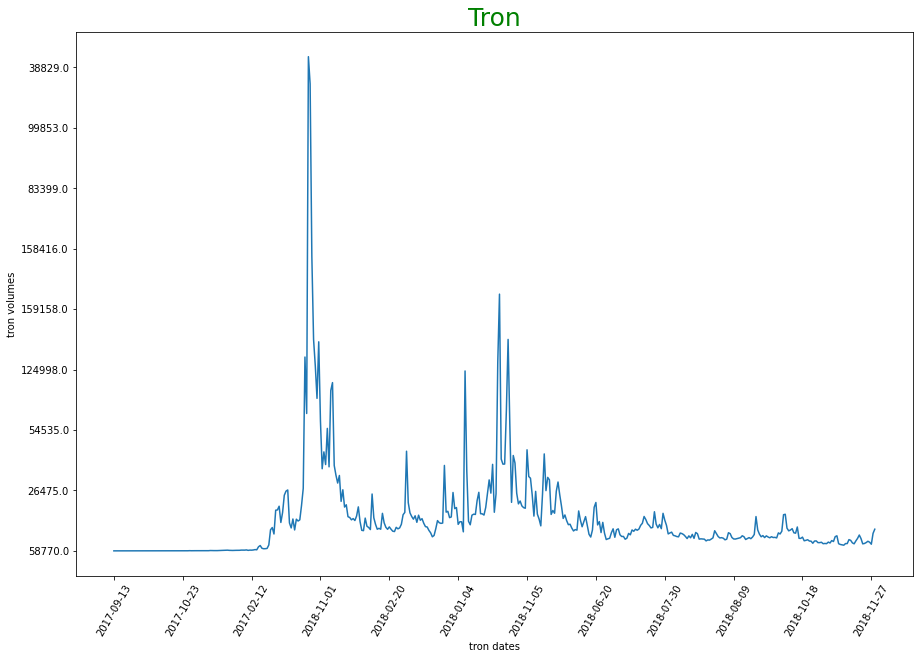


Showing Plot of iota



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


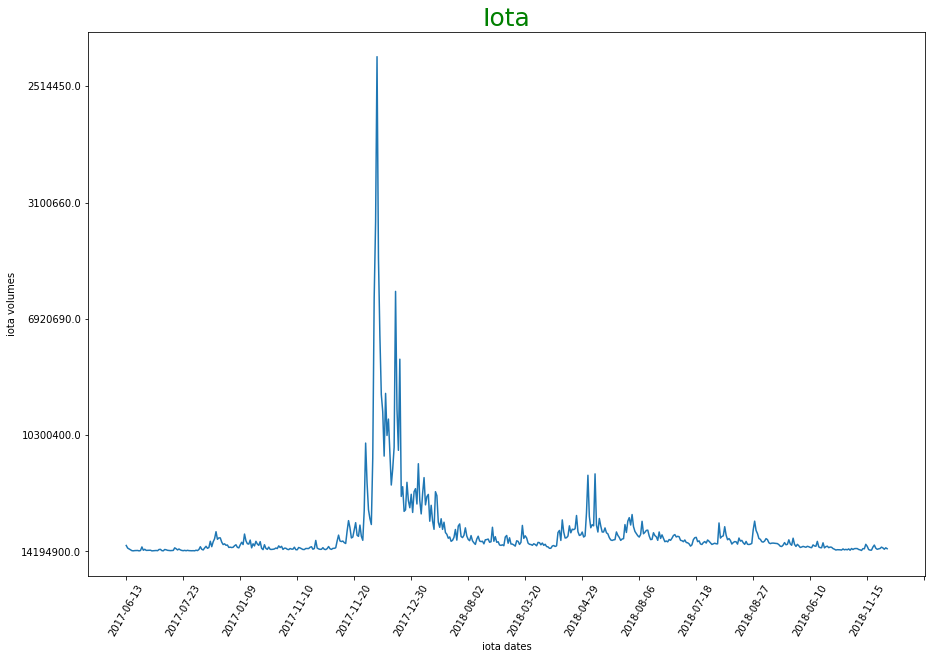


Showing Plot of dash



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


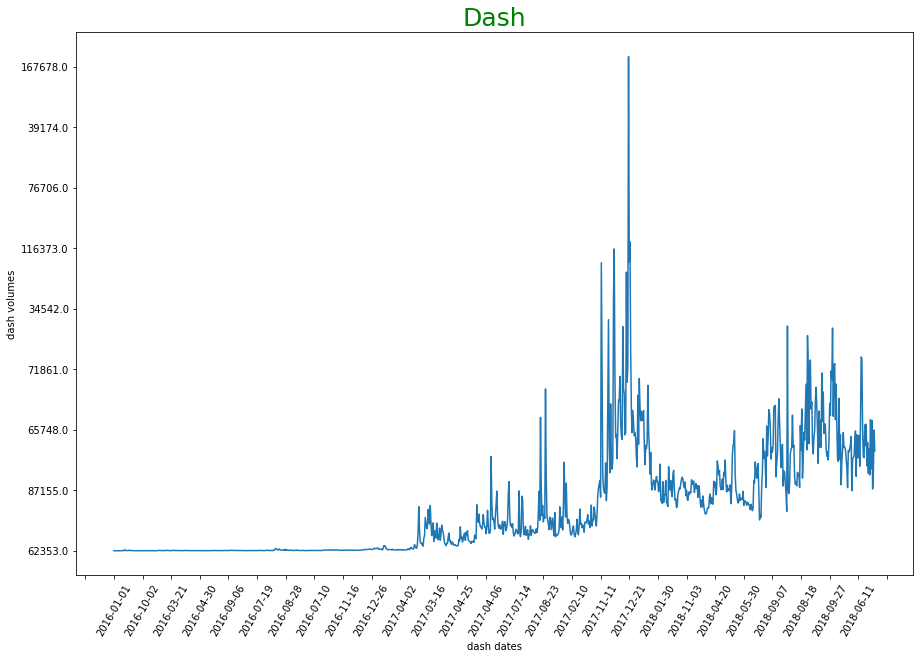


Showing Plot of nem



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


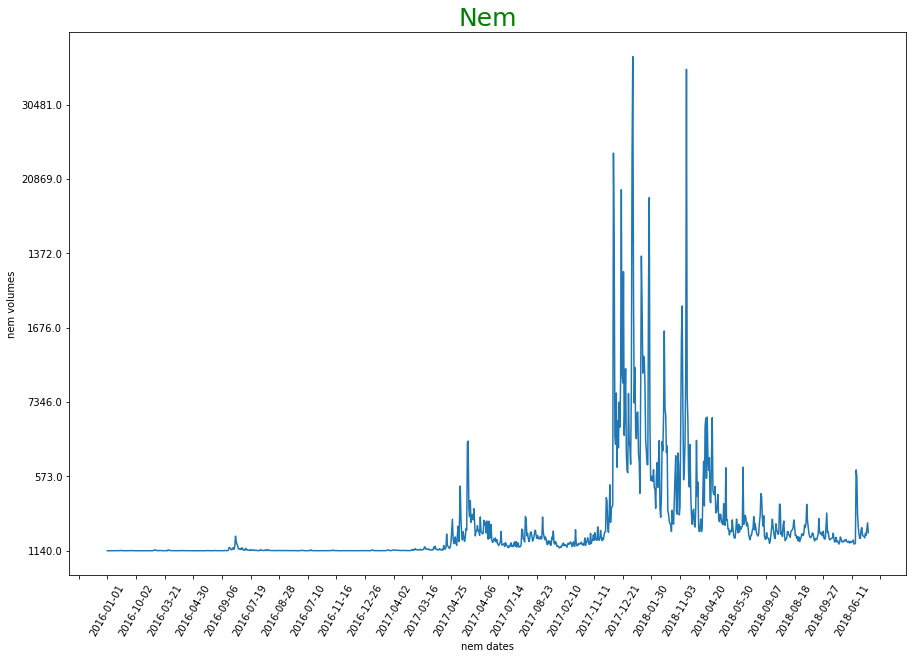


Showing Plot of binance-coin



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


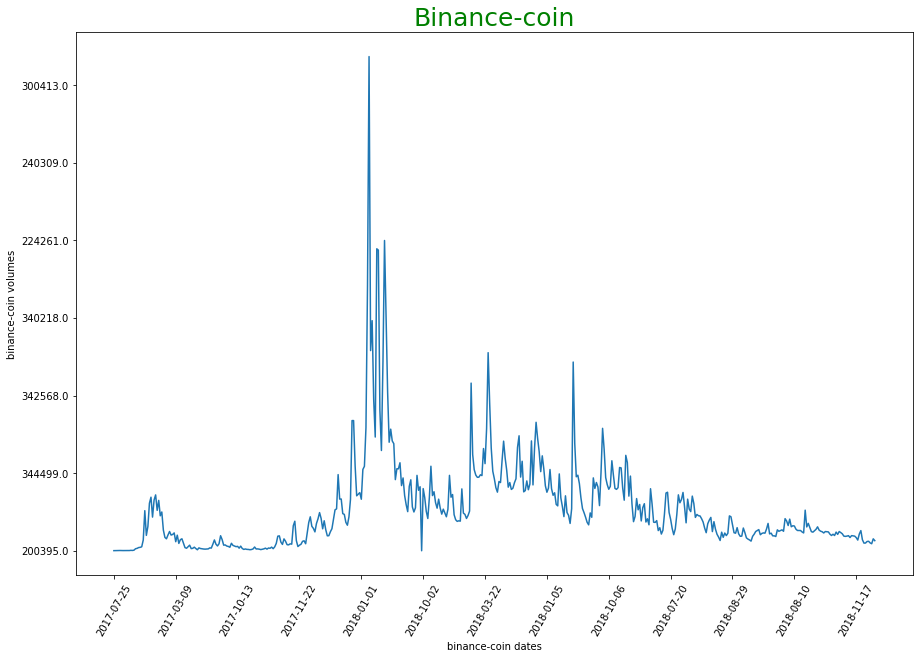


Showing Plot of neo



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


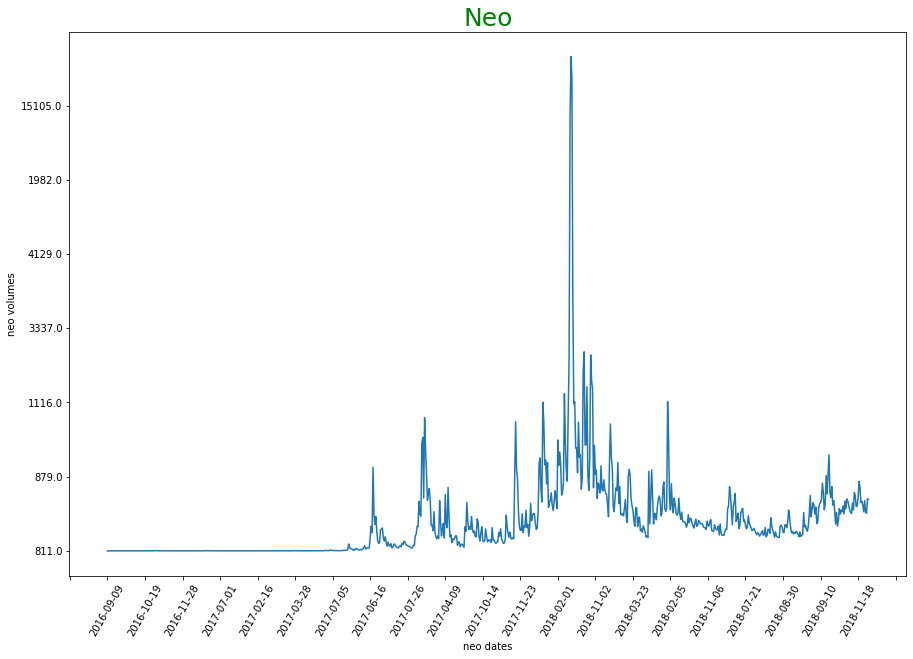


Showing Plot of ethereum-classic



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


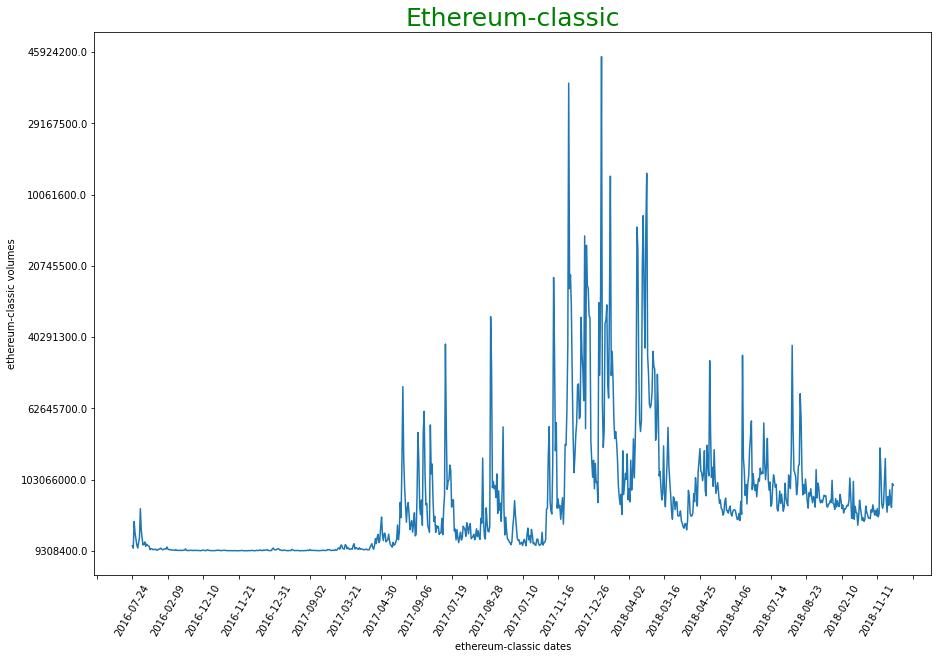


Showing Plot of zcash



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


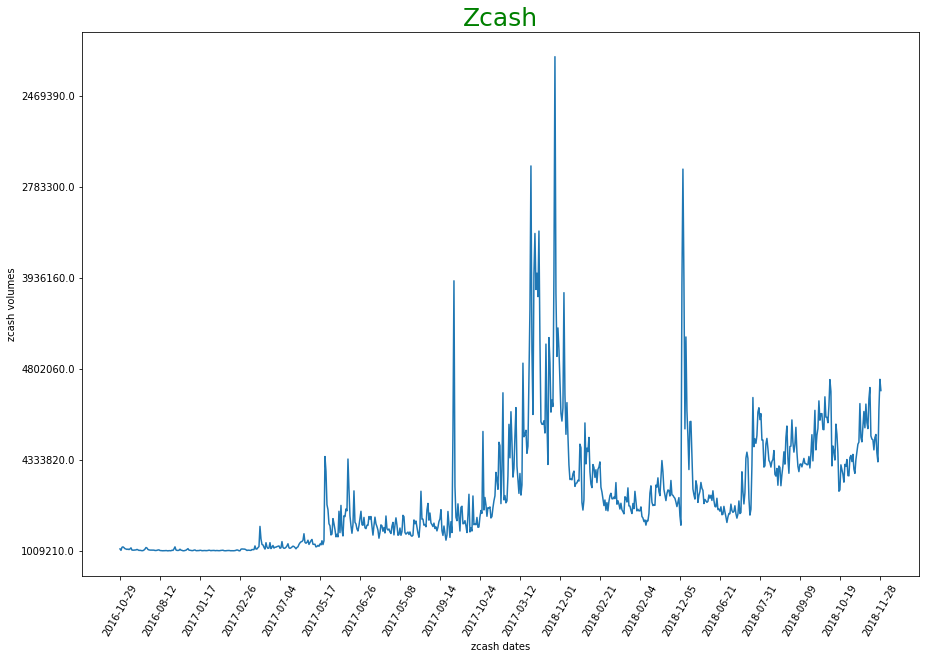


Showing Plot of bitcoin-gold



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


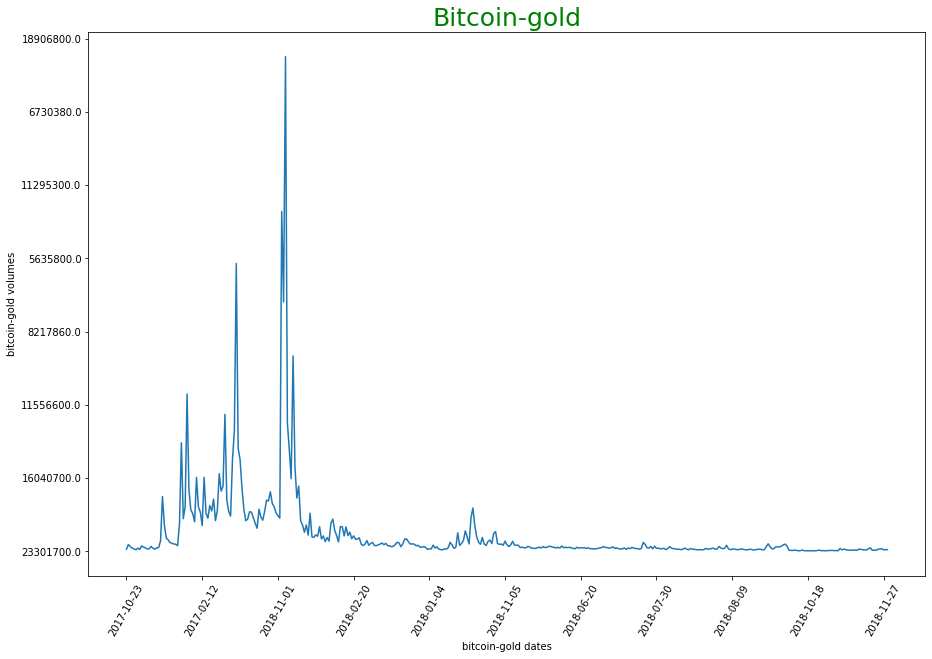


Showing Plot of tezos



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


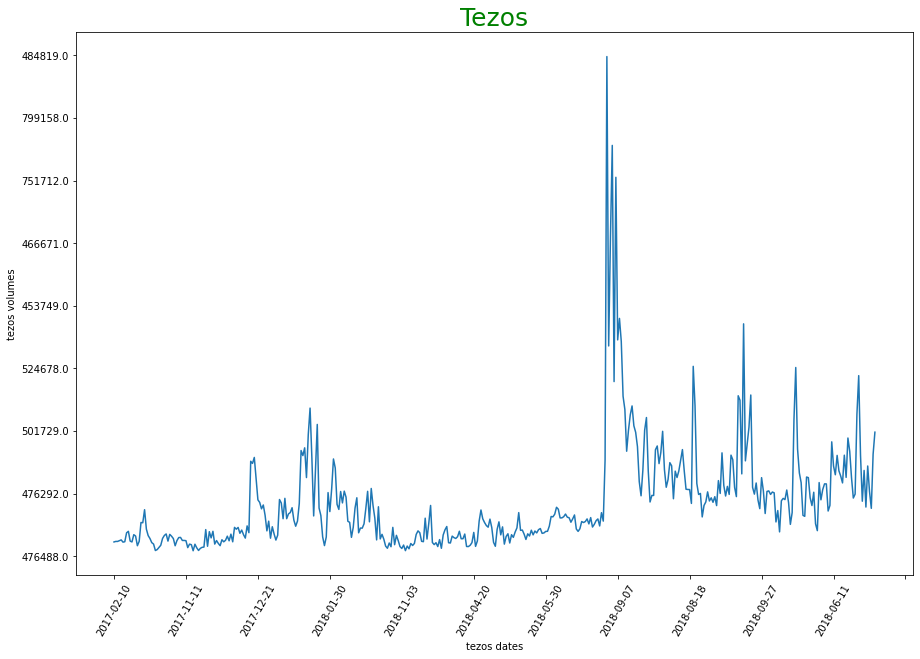


Showing Plot of maker



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


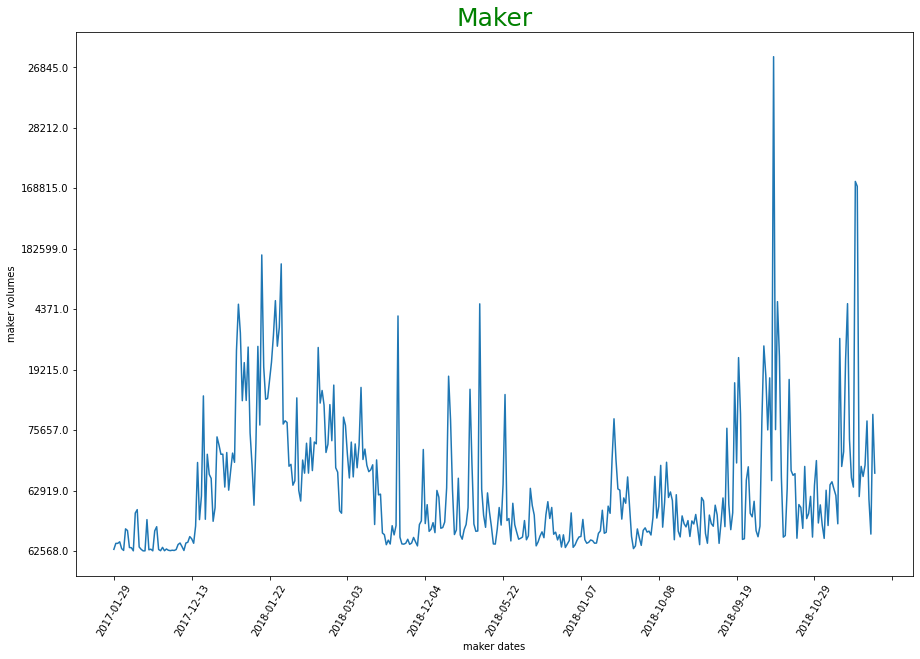


Showing Plot of vechain



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


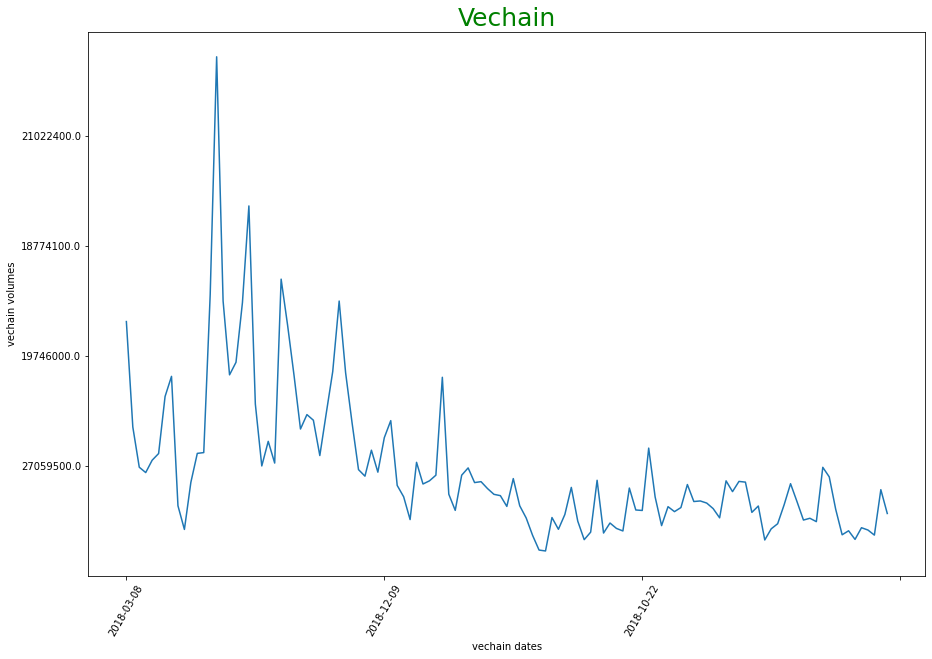


Showing Plot of dogecoin



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


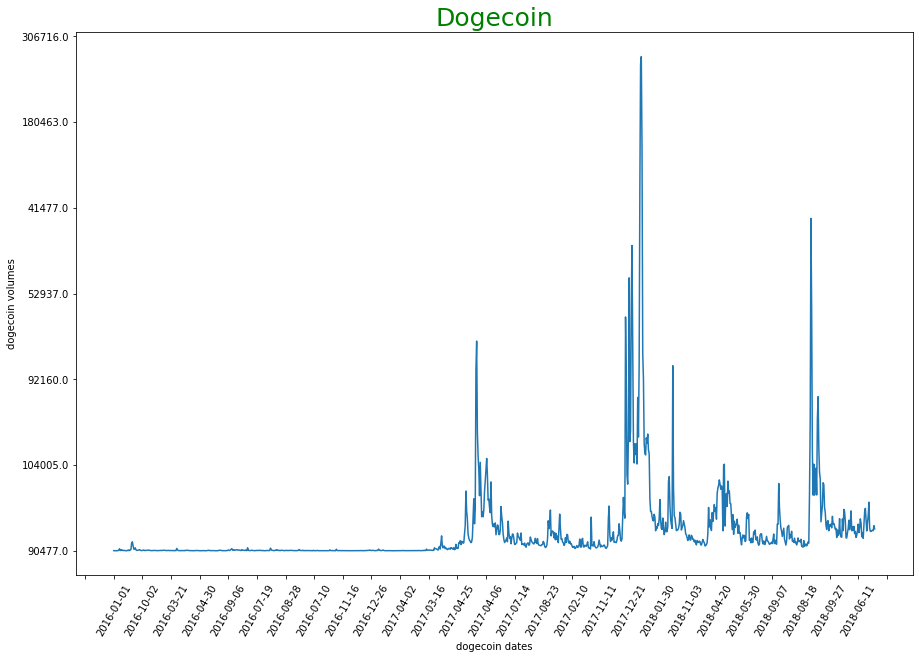


Showing Plot of ontology



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


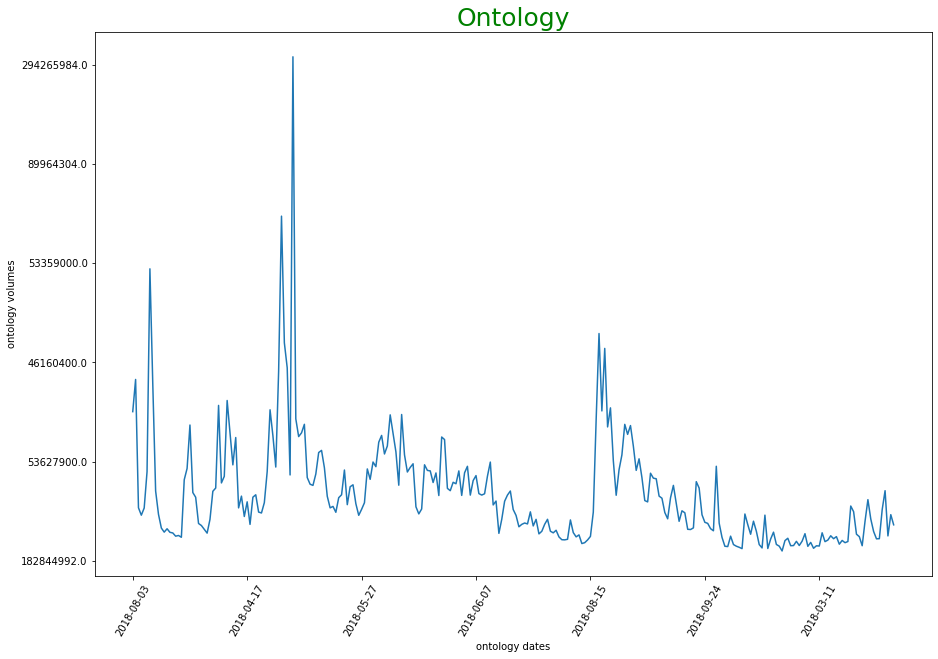


Showing Plot of 0x



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


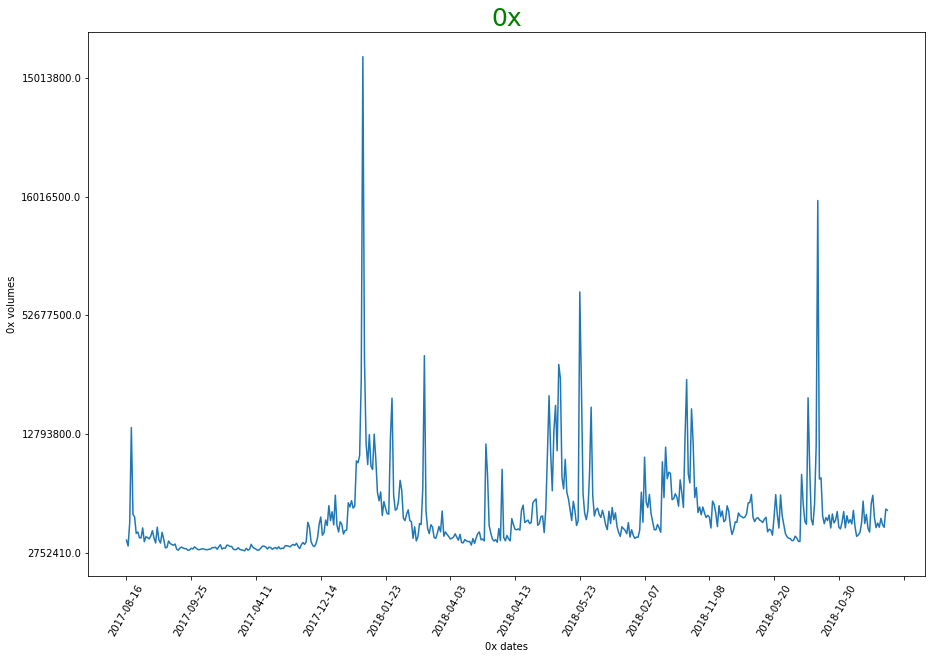


Showing Plot of omisego



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


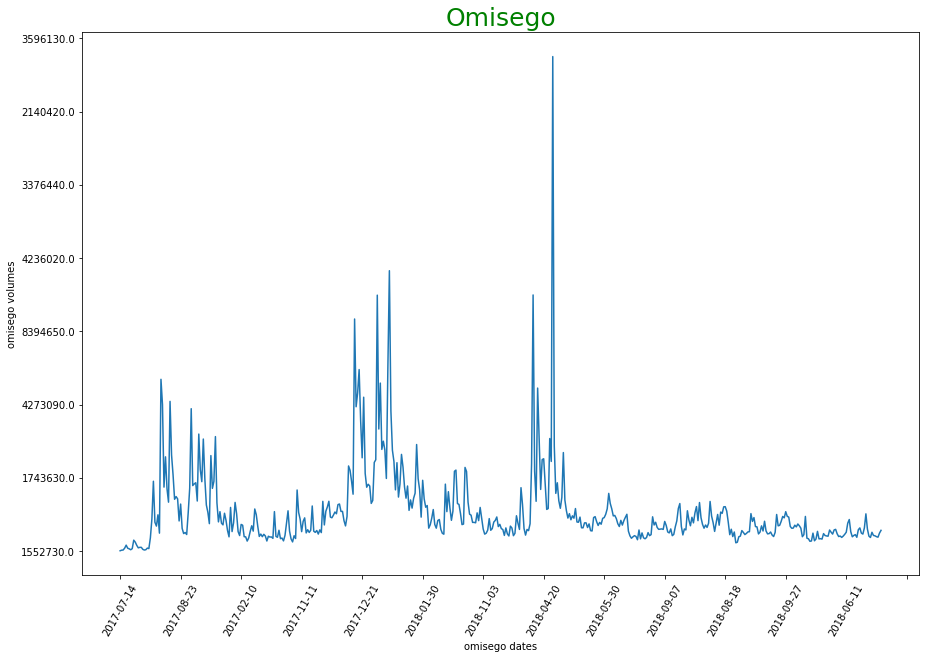


Showing Plot of basic-attention-token



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


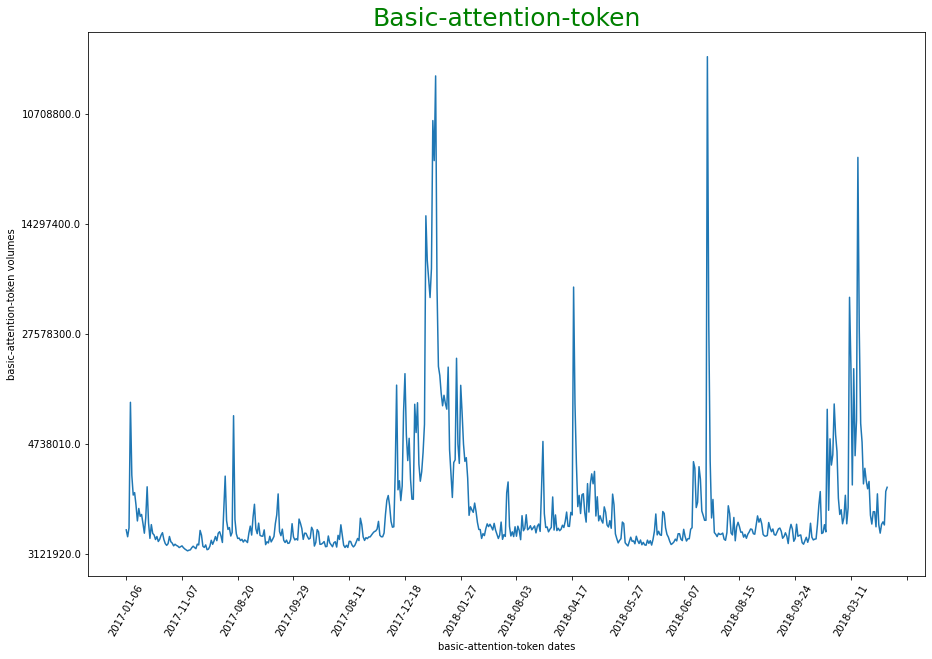


Showing Plot of trueusd



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


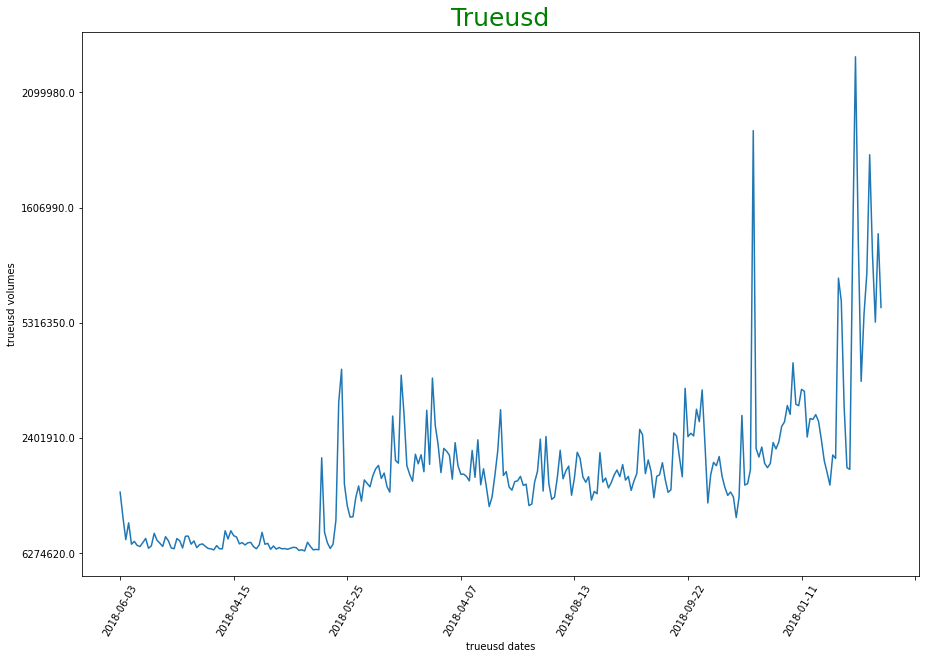


Showing Plot of qtum



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


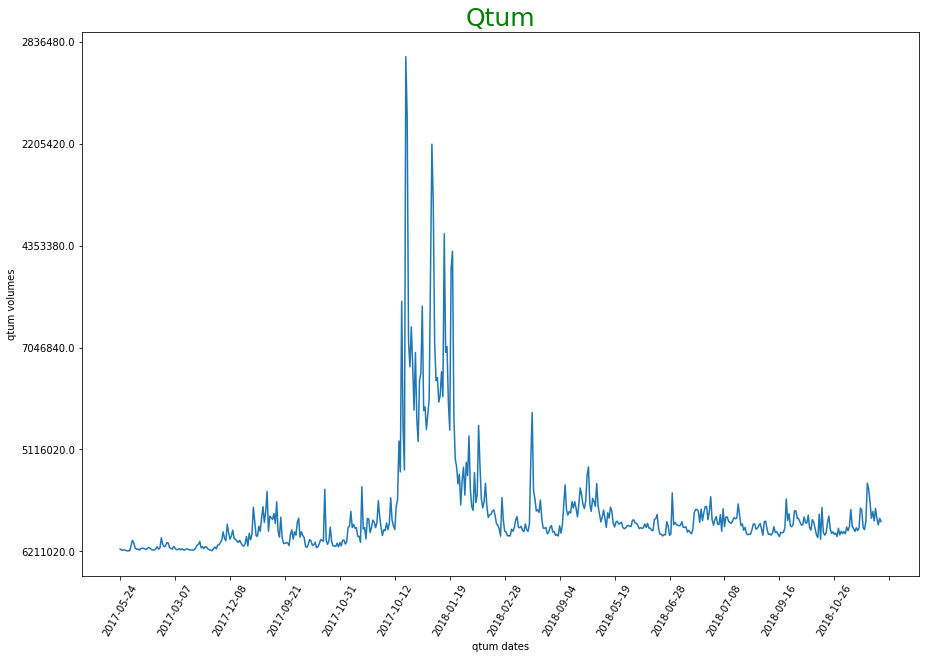


Showing Plot of usd-coin



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


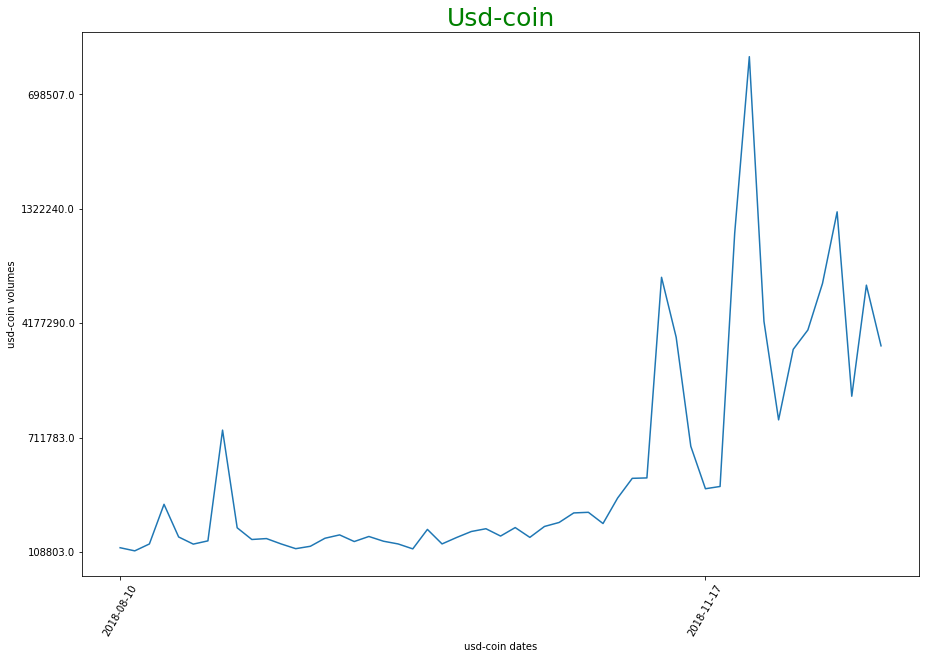


Showing Plot of decred



c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


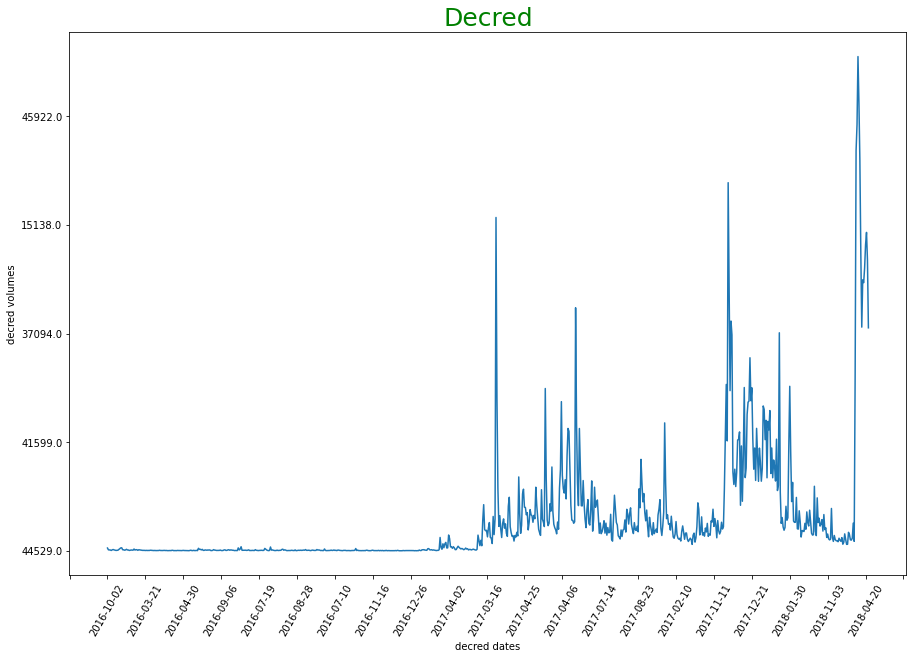

In [24]:
for index, col in enumerate(slugs):
    print("\nShowing Plot of " + col)
    showPlot(latestGroupedDataDF[col]['date'].dt.strftime('%Y-%m-%d'), latestGroupedDataDF[col]['volume'], col)